In [1]:
import os 
from time import time
from random import uniform, randint

import pandas as pd 
import numpy  as np 
import torch
import matplotlib.pyplot as plt 

from tqdm import tqdm

from utils import load_mch
from utils.mch import MCHHandler

from utils.kde import smooth

# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
wl = [i for i in range(660, 921, 10)]
%matplotlib inline

In [143]:
# 2e8
# mus, mua (in 1/mm)
photon5e10 = [[20, 0.17]]
photon1e10 = []
photon5e9 = []
photon1e9 = []
photon2e8 = [[0.7816, 0.1]]
photon1e8 = []
photon5e7 = [[0.1, 0.0], [0.3, 0.1], [0.4, 0], [0.5, 0.065], [0.6, 0.225], [0.7, 0.005]]


IndexError: index 0 is out of bounds for axis 0 with size 0

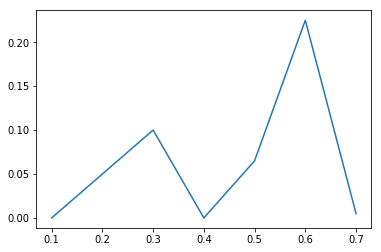

In [149]:
def plot(p, num):
    plt.plot(np.array(p).T[0], np.array(p).T[1], label=num)
    
plot(photon5e7, "5e7")
plot(photon5e10, "5e10")
plt.xlabel("scattering")
plt.ylabel("absorption")
plt.legend()

In [7]:
r = []
# mua = np.array([0.1, 3, 0.1, 5, 20])
mua = np.array([0.07, 0.01, 0.1, 5, 2])
for i in range(1, 4):
    df, header, _ = load_mch(
        "output/test_cv/mcx_output/test_cv_{}.mch".format(i)
    )
    pl = df[df.detector_idx==1].iloc[:, 2:7].values
    white = np.exp(np.matmul(-pl, mua)).sum()/1e10
    print(white)
    r += [white]
    
r = np.asarray(r)
np.std(r)/np.mean(r), header["total_photon"]

9.410988098679166e-09
9.613157829312654e-09
9.574293847745553e-09


(0.009188509919540877, 1410065408)

In [3]:
r = []
mua = np.array([0.1, 1, 5, 5, 20])
mua = np.array([0.07, 0.1, 0.1, 5, 2])
for i in range(1, 11):
    df, header, _ = load_mch(
        "output/test_cv_2/mcx_output/test_cv_2_{}.mch".format(i)
    )
    pl = df[df.detector_idx==1].iloc[:, 2:7].values
    white = np.exp(np.matmul(-pl, mua)).sum()/header["total_photon"]
    print(white)
    r += [white]
    
r = np.asarray(r)
np.std(r)/np.mean(r)

2.0274460868079613e-10
2.1580345221822666e-10
1.472104190463735e-10
1.4053839370691122e-10
1.6478742020769452e-10
1.2861959269822387e-10
2.3919867971915313e-10
1.4291156095079828e-10
2.1686370557211676e-10
1.825632789972495e-10


0.20637541714315377

In [21]:
r = []
mua = np.array([0.1, 1, 5, 5, 20])
mua = np.array([0.07, 0.1, 0.1, 5, 2])
for i in range(1, 8):
    df, header, _ = load_mch(
        "output/test_cv_3/mcx_output/test_cv_3_{}.mch".format(i)
    )
    pl = df[df.detector_idx==1].iloc[:, 2:7].values
#     white = np.exp(np.matmul(-pl, mua)).sum()/header["total_photon"]
    white = np.exp(np.matmul(-pl, mua)).sum()/1e10

    print(white)
    r += [white]
    
r = np.asarray(r)
np.std(r)/np.mean(r)

2.0860075602266431e-10
1.782381405607212e-10
1.7646946394515065e-10
1.922665540444343e-10
1.9097861185681997e-10
1.7784215415031326e-10
1.7933394796111235e-10


0.05869365759875546

In [20]:
header

{'version': 1,
 'maxmedia': 5,
 'detnum': 3,
 'colcount': 14,
 'total_photon': 1410065408,
 'detected': 1227740,
 'saved_photon': 1227740,
 'unitmm': 0.25,
 'seed_byte': 0,
 'normalize': 0.3199999928474426,
 'respin': 1}

In [148]:
r = []
# mua = np.array([0.1, 1, 5, 5, 20])
mua = np.array([0.07, 0.1, 0.17, 5, 2])
for i in range(1, 4):
    df, header, _ = load_mch(
        "output/test_cv_4/mcx_output/test_cv_4_{}.mch".format(i)
    )
    pl = df[df.detector_idx==1].iloc[:, 2:7].values
#     white = np.exp(np.matmul(-pl, mua)).sum()/header["total_photon"]
    white = np.exp(np.matmul(-pl, mua)).sum()/5e10
    
    print(white)
    r += [white]
    
r = np.asarray(r)
np.std(r)/np.mean(r)

8.377620302446625e-11
8.546307950455136e-11
8.123831660512579e-11


0.020796792159362098

In [15]:
header

{'version': 1,
 'maxmedia': 5,
 'detnum': 3,
 'colcount': 14,
 'total_photon': -1539608576,
 'detected': 6137892,
 'saved_photon': 6137892,
 'unitmm': 0.25,
 'seed_byte': 0,
 'normalize': 0.06400000303983688,
 'respin': 1}

In [13]:
a = [1,2,3]
a[1:2]

[2]

In [11]:
"output/test_cv_4/mcx_output/test_cv_4_1.mch"
df.head(100)

,detector_idx,scattering,media_0,media_1,media_2,media_3,media_4,x,y,z,dx,dy,dz,weight
0,1.0,74.0,15.465272,16.231298,11.830472,0.000000,0.000000,91.962784,75.186005,-0.000061,-0.718356,-0.674419,-0.170656,1.0
1,1.0,119.0,21.596989,8.511086,21.130480,0.000000,0.000000,87.715210,74.894737,-0.000061,0.204928,-0.764027,-0.611773,1.0
2,2.0,99.0,19.418720,16.318359,21.232000,0.000000,0.000000,104.054192,72.062500,-0.000061,0.228039,-0.819363,-0.525969,1.0
3,2.0,186.0,8.793384,17.842520,34.900826,0.000000,0.000000,102.823654,72.421478,-0.000061,0.312339,-0.095215,-0.945187,1.0
4,1.0,100.0,14.715180,6.733305,19.107767,0.000000,0.000000,91.532188,77.326630,-0.000061,0.893462,0.336621,-0.297343,1.0
5,1.0,148.0,18.336325,5.140808,27.946989,0.000000,0.000000,91.952011,73.368584,-0.000061,0.383472,-0.739692,-0.552996,1.0
6,1.0,208.0,19.044289,27.214380,37.682926,0.000000,0.000000,86.894798,75.071045,-0.000061,0.386781,0.509512,-0.768634,1.0
7,2.0,214.0,13.969054,10.278285,41.658043,0.000000,0.000000,102.975822,72.297562,-0.000061,0.164280,-0.450449,-0.877558,1.0
8,1.0,156.0,2.274407,1.648809,33.918522,0.000000,0.000000,90.166901,76.793991,-0.000061,0.232565,0.796031,-0.558792,1.0
9,3.0,133.0,15.265472,20.542543,20.895414,0.000000,0.000000,117.577827,73.035004,-0.000061,-0.328487,0.364663,-0.871274,1.0


In [10]:
df.head(10)

,detector_idx,scattering,media_0,media_1,media_2,media_3,media_4,x,y,z,dx,dy,dz,weight
0,2.0,1770.0,20.473202,31.659401,32.534168,22.808699,0.0,101.378700,74.180016,-0.000061,0.373202,0.341767,-0.862505,1.0
1,2.0,1663.0,12.258695,24.069538,38.968670,46.451149,0.0,110.134842,74.822609,-0.000061,0.146240,0.284441,-0.947474,1.0
2,1.0,3066.0,19.624304,41.221764,88.230659,23.359716,0.0,89.925041,71.997757,-0.000061,-0.790297,-0.090121,-0.606060,1.0
3,2.0,3341.0,16.239391,56.963760,78.162849,74.843864,0.0,103.223648,72.984932,-0.000061,0.581849,0.227705,-0.780770,1.0
4,1.0,4368.0,33.657146,100.402008,49.953850,0.000000,0.0,88.442856,70.620949,-0.000061,-0.302732,-0.443279,-0.843716,1.0
5,1.0,2318.0,21.786766,22.139057,78.002335,49.483913,0.0,87.423531,75.033043,-0.000061,-0.308512,-0.758616,-0.573866,1.0
6,2.0,3024.0,8.769260,26.993731,107.661278,36.357327,0.0,106.552170,72.305481,-0.000061,0.150803,-0.025257,-0.988241,1.0
7,2.0,4042.0,9.578978,41.457340,130.183243,30.986837,0.0,103.440407,77.855560,-0.000061,-0.538019,-0.199809,-0.818909,1.0
8,2.0,2785.0,12.259714,38.119030,77.216156,46.751560,0.0,102.928848,73.578682,-0.000061,0.419612,-0.656226,-0.627131,1.0
9,1.0,6174.0,19.391495,36.325104,251.053131,26.082146,0.0,89.157219,74.330345,-0.000061,0.235852,0.291552,-0.927023,1.0


In [11]:
mch = MCHHandler()
r = []
for i in range(1, 11):
    rr = mch.run_wmc_single(
        "output/test_cv/mcx_output/test_cv_{}.mch".format(i),
        args
    )
    r += [rr]
    
r = np.asarray(r)
r.shape

(10, 30, 3)

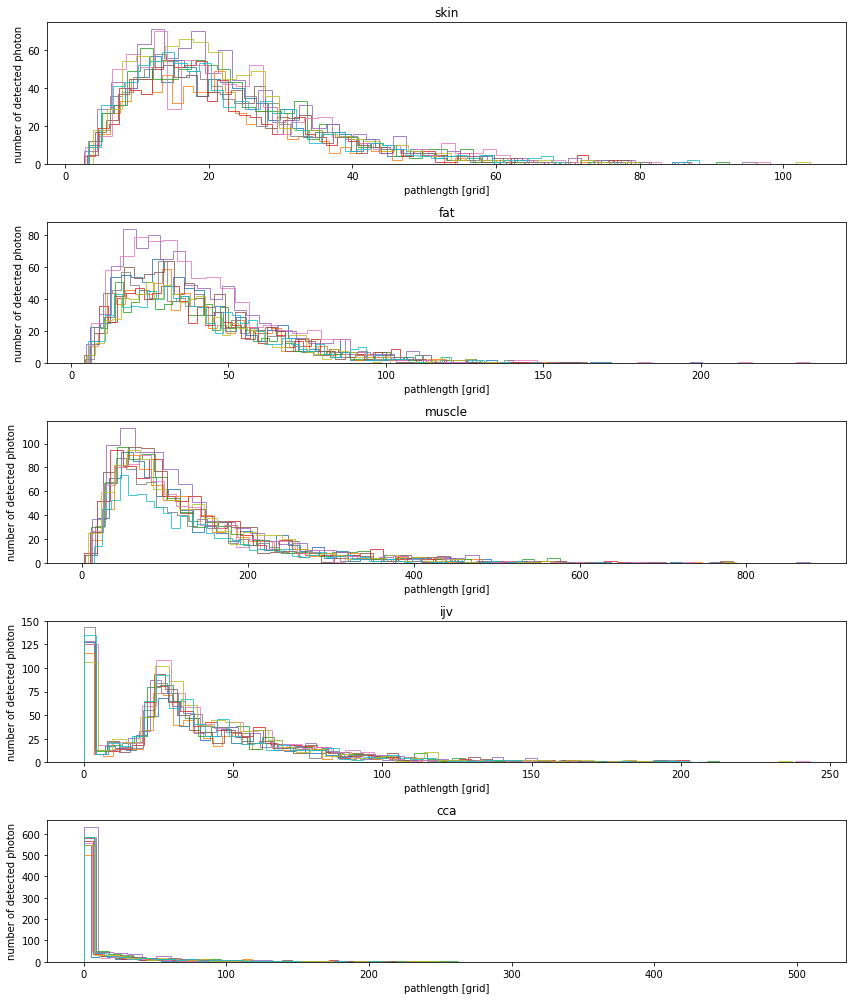

10

In [74]:
detected = []
pl = []
pl_std = []
ca = np.arcsin(0.12/1.457)
fig, ax = plt.subplots(5, figsize=(12, 14))
for i in range(1, 11):
    d, header, _ = mch._load_mch(
        "output/test_cv/mcx_output/test_cv_{}.mch".format(i),
    )
    d = d[(np.arccos(d.angle.abs())<=ca)&(d.detector_idx==1)]
    pl += [d.iloc[:, 1:-1].mean().values]
    pl_std += [d.iloc[:, 1:-1].std().values]
    detected += [header["detected"]]
    skin = d.iloc[:, 1]
    fat = d.iloc[:, 2]
    muscle = d.iloc[:, 3]
    ijv = d.iloc[:, 4]
    cca = d.iloc[:, 5]
    kwargs = dict(bins=50, alpha=0.8, ec="C{}".format((i-1)%10), histtype="step")
    ax[0].hist(skin, **kwargs)
    ax[1].hist(fat, **kwargs)
    ax[2].hist(muscle, **kwargs)
    ax[3].hist(ijv, **kwargs)
    ax[4].hist(cca, **kwargs)
ax[0].set_title("skin")
ax[1].set_title("fat")
ax[2].set_title("muscle")
ax[3].set_title("ijv")
ax[4].set_title("cca")

ax[0].set_xlabel("pathlength [grid]")
ax[1].set_xlabel("pathlength [grid]")
ax[2].set_xlabel("pathlength [grid]")
ax[3].set_xlabel("pathlength [grid]")
ax[4].set_xlabel("pathlength [grid]")
ax[0].set_ylabel("number of detected photon")
ax[1].set_ylabel("number of detected photon")
ax[2].set_ylabel("number of detected photon")
ax[3].set_ylabel("number of detected photon")
ax[4].set_ylabel("number of detected photon")
# plt.xlabel("pathlength [grid]")
# plt.ylabel("number of detected photon")
plt.tight_layout()
# plt.legend()
plt.show()
    
    
    
    
pl = np.array(pl)
pl_std = np.array(pl_std)
len(pl)

In [ ]:
1, 7, 9

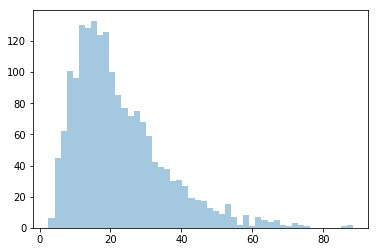

In [47]:
plt.hist(skin, bins=50, alpha=0.4, label="skin")
plt.show()

In [48]:
pl_std.std(0)/pl_std.mean(0)

array([0.02402176, 0.02018699, 0.03428478, 0.01976648, 0.01814493])

In [71]:
pl.std(0)/pl.mean(0)

array([0.01300187, 0.00995155, 0.01177809, 0.01663936, 0.02765493])

In [50]:
np.std(detected)/np.mean(detected)

0.001189066463042945

In [51]:
detected

[242504,
 241900,
 242264,
 242198,
 242689,
 242874,
 242770,
 242726,
 242602,
 242631]

In [156]:
r = []
for i in range(10):
    print(i)
    mua = np.array([0.0323523, 0.00708457, 0.0131179, 0.0211842, 0.0203064])
#     os.system("""./mcx --session "Ysc8SoJn2q" --input "/home/md703/ijv/train/input_mcx_Ysc8SoJn2q.json" --root "/home/md703/ijv/train/mch" --gpu 1 --autopilot 1 --photon 20000000 --repeat 1 --normalize 1 --save2pt 0 --reflect 1 --savedet 1 --saveexit 1 --unitinmm 0.250000 --saveseed 0 --skipradius -2 --array 0 --dumpmask 0 --maxdetphoton 10000000""")
    df, header, _ = load_mch(
        "/home/md703/ijv/train/mch/Ysc8SoJn2q.mch"
    )
    pl = df[df.detector_idx==1].iloc[:, 2:7].values
#     white = np.exp(np.matmul(-pl, mua)).sum()/header["total_photon"]
    white = np.exp(np.matmul(-pl, mua)).sum()/header["total_photon"]
    
    print(white)
    r += [white]
    
r = np.asarray(r)
np.std(r)/np.mean(r)

0
5.92947255101115e-05
1
5.92947255101115e-05
2
5.92947255101115e-05
3
5.92947255101115e-05
4
5.92947255101115e-05
5
5.92947255101115e-05
6
5.92947255101115e-05
7
5.92947255101115e-05
8
5.92947255101115e-05
9
5.92947255101115e-05


1.1428105147191973e-16

In [5]:
path = "/home/md703/ijv/train/mch/Ysc8SoJn2q.mch"
mch = MCHHandler()
mua = np.array([[0.0323523, 0.00708457, 0.0131179, 0.0211842, 0.0203064]])

s = mch.run_wmc_train(path, mua.T)

/home/md703/ijv/utils/mch.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mua = torch.tensor(mua).float().to(device)


In [2]:
critical_angle = np.arcsin(0.12/1.457)

In [5]:
mch_file = "/home/md703/ijv/train/mch/IzAQ3PRvqS.mch"
mua = np.array([[0.0323523, 0.00708457, 0.0131179, 0.0211842, 0.0203064]]).T
critical_angle = np.arcsin(0.12/1.457)

df, header, photon = load_mch(mch_file)
# df = df[np.arccos(df.dz.abs()) <= critical_angle]

df = df.reset_index(drop=True)
# path_length = df.iloc[:, ["media_{}".format(i) for i in range(header["maxmedia"])]].values

result = torch.zeros(1, mua.shape[1]).float()

for idx in range(1, header["detnum"]+1):
    tmp = df[df["detector_idx"]==idx]

    path_length = tmp[["media_{}".format(i) for i in range(header["maxmedia"])]].values

    path_length = torch.tensor(path_length).float()

    mua = torch.tensor(mua).float()


    # [光子數, 吸收數]
    weight = torch.exp(-torch.matmul(path_length, mua))
    weight = weight.sum(0)
    weight = weight.unsqueeze(0)
    result = torch.cat((result, weight), 0)



# # [SDS, ScvO2]
result = result[1:]
s = result.cpu().numpy()/header["total_photon"]



/home/md703/toast/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [6]:
s

array([[1.39092422e-04],
       [6.49199219e-05],
       [3.09315547e-05]])

In [7]:
header

{'version': 1,
 'maxmedia': 5,
 'detnum': 3,
 'colcount': 14,
 'total_photon': 4000000000,
 'detected': 3661238,
 'saved_photon': 3661238,
 'unitmm': 0.25,
 'seed_byte': 0,
 'normalize': 0.800000011920929,
 'respin': 2}

In [15]:
df.shape

(6069, 14)

In [18]:
weight.shape

torch.Size([1850, 1])